<a href="https://colab.research.google.com/github/baibhavnfs2001/ADLJan-Apr/blob/main/Predict%20Stock%20Prices%20using%20LSTM%20(ADL%20Jan-Apr%2022).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv("AAPL_daily_update.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,79.117142,79.285713,77.375717,78.432854,68.687538,140129500
1,2013-01-03,78.268570,78.524284,77.285713,77.442856,67.820526,88241300
2,2013-01-04,76.709999,76.947144,75.118568,75.285713,65.931404,148583400
3,2013-01-07,74.571426,75.614288,73.599998,74.842857,65.543602,121039100
4,2013-01-08,75.601425,75.984283,74.464287,75.044289,65.719994,114676800


In [ ]:
#feature extraction
data_final = data[["Date", "Open", "Close"]]
data_final.head()

,Date,Open,Close
0,2013-01-02,79.117142,78.432854
1,2013-01-03,78.268570,77.442856
2,2013-01-04,76.709999,75.285713
3,2013-01-07,74.571426,74.842857
4,2013-01-08,75.601425,75.044289


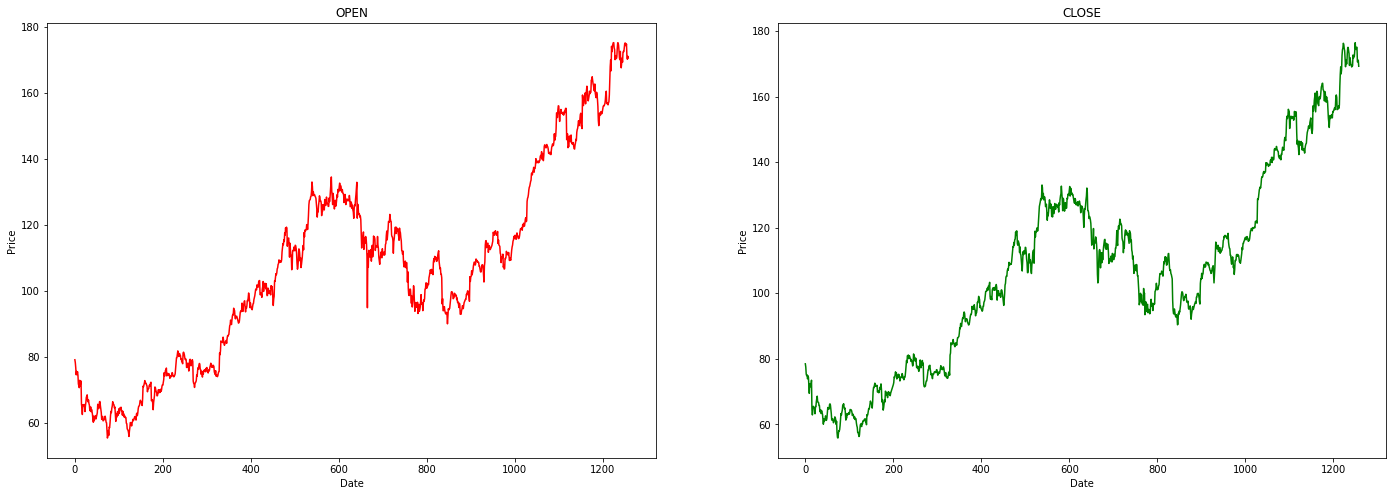

In [ ]:
#visualisation
plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
plt.title('OPEN')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(data_final['Open'], color = 'red')
plt.subplot(1, 2, 2)
plt.title('CLOSE')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(data_final['Close'], color = 'green')
plt.show()

In [ ]:
scaler = MinMaxScaler()
print(data_final.loc[1, "Date"].split())
data_final['Date'] = pd.to_datetime(data_final['Date'].apply(lambda x: x.split()[0]))
data_final.set_index('Date', drop = True, inplace = True) 
data_final.loc[:, ["Open", "Close"]] = scaler.fit_transform(data_final.loc[:, ["Open", "Close"]])
data_final.head()

['2013-01-03']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

,Open,Close
Date,,
2013-01-02,0.197959,0.187705
2013-01-03,0.190869,0.179498
2013-01-04,0.177847,0.161616
2013-01-07,0.159978,0.157945
2013-01-08,0.168584,0.159614


In [ ]:
#Train - Test split
train_len = round(len(data_final) * 0.7)
training_data = data_final[:train_len]
training_data.head()

,Open,Close
Date,,
2013-01-02,0.197959,0.187705
2013-01-03,0.190869,0.179498
2013-01-04,0.177847,0.161616
2013-01-07,0.159978,0.157945
2013-01-08,0.168584,0.159614


In [ ]:
testing_data = data_final[train_len:]
testing_data.head()

,Open,Close
Date,,
2016-07-01,0.334758,0.332421
2016-07-05,0.333922,0.324961
2016-07-06,0.327322,0.329437
2016-07-07,0.336512,0.332836
2016-07-08,0.343113,0.338970


In [ ]:
#Create training and testing seqeunces along with their prediction labels
def makeSeq(dataset):
  sequences = []
  labels = []
  starting = 0

  for stopping in range(50, len(dataset)): 
    sequences.append(dataset.iloc[starting : stopping])
    labels.append(dataset.iloc[stopping])
    starting += 1
  return (np.array(sequences).astype('float32'), np.array(labels).astype('float32'))

In [ ]:
training_seq, training_labels = makeSeq(training_data)
testing_seq, testing_labels = makeSeq(testing_data)

In [ ]:
print(np.shape(training_seq), np.shape(training_labels))
print(np.shape(testing_seq), np.shape(testing_labels))

(831, 50, 2) (831, 2)
(328, 50, 2) (328, 2)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
#LSTM Model
model = Sequential()
model.add(LSTM(50, input_shape = (training_seq.shape[1], training_seq.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(2))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = 'mean_absolute_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 10,702
Trainable params: 10,702
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(training_seq, training_labels, epochs = 80, verbose = 1, batch_size = 16)

Epoch 1/80
52/52 [==============================] - 4s 23ms/step - loss: 0.0395 - mean_absolute_error: 0.1301
Epoch 2/80
52/52 [==============================] - 1s 22ms/step - loss: 0.0043 - mean_absolute_error: 0.0506
Epoch 3/80
52/52 [==============================] - 1s 23ms/step - loss: 0.0036 - mean_absolute_error: 0.0439
Epoch 4/80
52/52 [==============================] - 1s 22ms/step - loss: 0.0031 - mean_absolute_error: 0.0412
Epoch 5/80
52/52 [==============================] - 1s 22ms/step - loss: 0.0024 - mean_absolute_error: 0.0366
Epoch 6/80
52/52 [==============================] - 1s 23ms/step - loss: 0.0023 - mean_absolute_error: 0.0359
Epoch 7/80
52/52 [==============================] - 1s 23ms/step - loss: 0.0023 - mean_absolute_error: 0.0349
Epoch 8/80
52/52 [==============================] - 1s 24ms/step - loss: 0.0022 - mean_absolute_error: 0.0349
Epoch 9/80
52/52 [==============================] - 1s 23ms/step - loss: 0.0021 - mean_absolute_error: 0.0339
Epoch 10/8

Text(0, 0.5, 'Loss')

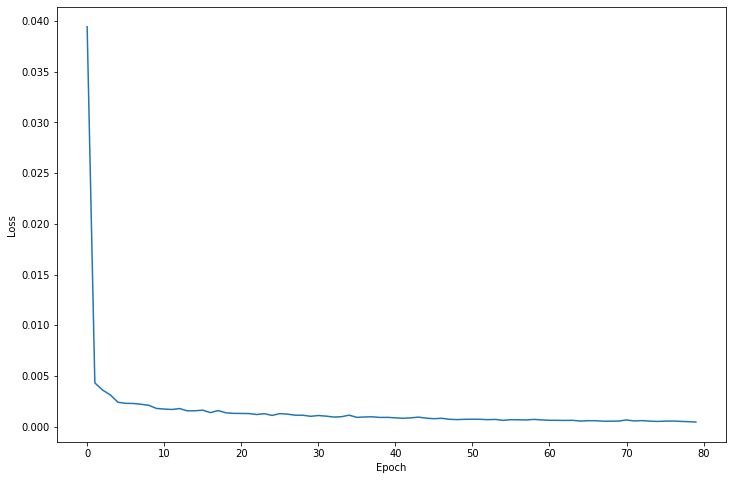

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

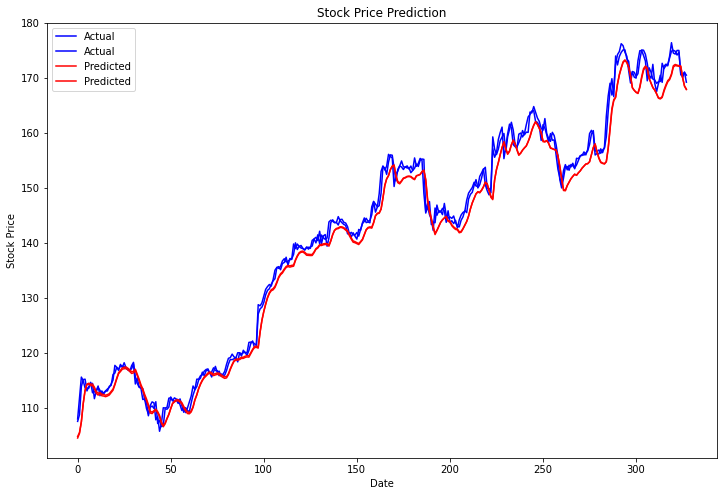

In [ ]:
labels_predicted = model.predict(testing_seq)
labels_predicted = scaler.inverse_transform(labels_predicted)
plt.figure(figsize = (12, 8))
plt.plot(scaler.inverse_transform(testing_labels), color = 'blue', label = 'Actual')
plt.plot(labels_predicted , color = 'red', label = 'Predicted')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(testing_seq, testing_labels, verbose = 1)

11/11 [==============================] - 1s 16ms/step - loss: 4.3985e-04 - mean_absolute_error: 0.0166


In [ ]:
print(labels_predicted)

[[104.48028  104.76302 ]
 [105.31435  105.49885 ]
 [107.407005 107.44725 ]
 [110.79767  110.71225 ]
 [113.19655  113.141556]
 [114.22514  114.29941 ]
 [114.26839  114.45203 ]
 [114.018005 114.27863 ]
 [114.01633  114.29662 ]
 [113.398705 113.74171 ]
 [112.62235  112.97172 ]
 [112.29389  112.61974 ]
 [112.49584  112.77547 ]
 [112.165474 112.46107 ]
 [112.124214 112.396034]
 [112.00439  112.270256]
 [112.128456 112.376915]
 [112.30914  112.549644]
 [112.73878  112.95836 ]
 [113.17514  113.38958 ]
 [114.13835  114.31084 ]
 [115.21295  115.38871 ]
 [116.18942  116.371765]
 [116.57511  116.7908  ]
 [117.00331  117.23831 ]
 [117.09509  117.35228 ]
 [117.135666 117.41499 ]
 [116.885864 117.18596 ]
 [116.59241  116.896065]
 [116.22971  116.536934]
 [116.34177  116.613625]
 [116.76836  117.00353 ]
 [115.85678  116.12476 ]
 [114.924355 115.224396]
 [113.87521  114.190056]
 [113.12508  113.42699 ]
 [112.10063  112.431335]
 [111.271614 111.58711 ]
 [110.24115  110.56797 ]
 [109.03446  109.35704 ]


In [ ]:
print(scaler.inverse_transform(testing_labels))

[[107.51     107.95    ]
 [108.73     111.77    ]
 [113.86     115.57    ]
 [115.12     114.91999 ]
 [115.19     113.58    ]
 [113.05     113.57    ]
 [113.85     113.549995]
 [114.35     114.62    ]
 [114.42     112.71    ]
 [111.64     112.88    ]
 [113.       113.09    ]
 [113.69     113.95    ]
 [113.16     112.17999 ]
 [112.46     113.049995]
 [112.71     112.52    ]
 [113.06     113.      ]
 [113.4      113.049995]
 [113.7      113.89    ]
 [114.31     114.06    ]
 [115.02     116.049995]
 [117.7      116.299995]
 [117.35     117.33999 ]
 [116.79     116.979996]
 [117.880005 117.63    ]
 [117.33     117.549995]
 [118.18     117.46999 ]
 [117.25     117.12    ]
 [116.86     117.05999 ]
 [116.81     116.59999 ]
 [117.100006 117.65    ]
 [117.95     118.25    ]
 [114.31     115.59    ]
 [115.39001  114.48    ]
 [113.87     113.72    ]
 [113.65     113.53999 ]
 [113.46     111.49    ]
 [111.4      111.59    ]
 [110.98     109.83    ]
 [108.53     108.84    ]
 [110.08     110.409996]
